In [3]:
pip install tensorflow

   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 1.0/390.3 MB 5.0 MB/s eta 0:01:18
   ---------------------------------------- 2.1/390.3 MB 5.6 MB/s eta 0:01:10
   ---------------------------------------- 3.1/390.3 MB 5.4 MB/s eta 0:01:12
   ---------------------------------------- 4.7/390.3 MB 5.6 MB/s eta 0:01:09
    --------------------------------------- 5.8/390.3 MB 5.6 MB/s eta 0:01:09
    --------------------------------------- 7.1/390.3 MB 5.7 MB/s eta 0:01:08
    --------------------------------------- 8.4/390.3 MB 5.7 MB/s eta 0:01:07
    --------------------------------------- 9.7/390.3 MB 5.8 MB/s eta 0:01:06
   - -------------------------------------- 11.0/390.3 MB 5.8 MB/s eta 0:01:06
   - -------------------------------------- 12.3/390.3 MB 5.9 MB/s eta 0:01:05
   - -------------------------------------- 13.6/390.3 MB 5.9 MB/s eta 0:01:04
   - -------------------------------------- 14.9/390.3 MB 5.9 MB/s e

 Dataset Loading

In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb

# Load the IMDB dataset
vocab_size = 10000  # Use the top 10,000 most common words
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Inspect the dataset
print(f"Training samples: {len(x_train)}, Testing samples: {len(x_test)}")
print(f"First review (encoded): {x_train[0]}")
print(f"First review label: {y_train[0]}")

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training samples: 25000, Testing samples: 25000
First review (encoded): [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 

Data Exploration

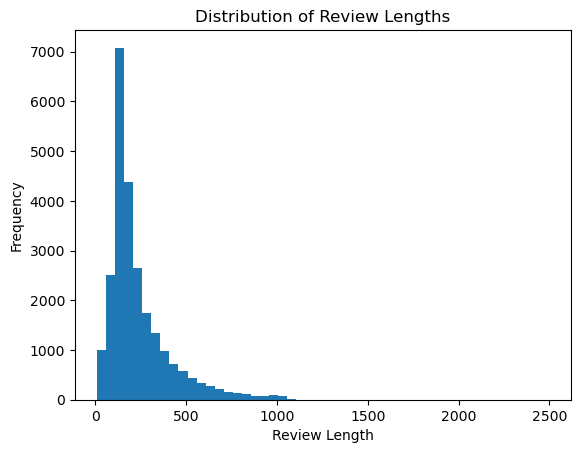

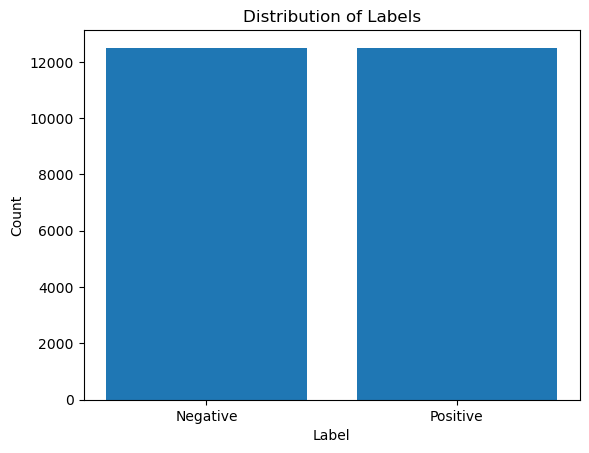

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Distribution of review lengths
review_lengths = [len(review) for review in x_train]
plt.hist(review_lengths, bins=50)
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.title('Distribution of Review Lengths')
plt.show()

# Distribution of labels
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()

 Text Preprocessing

In [9]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Pad sequences
max_length = 500
x_train_padded = pad_sequences(x_train, maxlen=max_length, padding='post')
x_test_padded = pad_sequences(x_test, maxlen=max_length, padding='post')

# Optionally, decode a few reviews back to text for better understanding
word_index = imdb.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}

def decode_review(encoded_review):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in encoded_review])

print(f"Decoded review: {decode_review(x_train[0])}")

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Decoded review: ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are am

Build the LSTM Model

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential([
    Embedding(vocab_size, 128, input_length=max_length),
    LSTM(128, return_sequences=True),
    LSTM(64),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.summary()

C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

 Train the Model

In [13]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_padded, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_test_padded, y_test))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 846s 2s/step - accuracy: 0.4969 - loss: 0.6947 - val_accuracy: 0.5085 - val_loss: 0.6932
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1041s 3s/step - accuracy: 0.5139 - loss: 0.6902 - val_accuracy: 0.5207 - val_loss: 0.6856
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1135s 3s/step - accuracy: 0.5425 - loss: 0.6803 - val_accuracy: 0.5121 - val_loss: 0.6915
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1007s 3s/step - accuracy: 0.5407 - loss: 0.6503 - val_accuracy: 0.5226 - val_loss: 0.7016
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 900s 2s/step - accuracy: 0.5474 - loss: 0.6377 - val_accuracy: 0.5299 - val_loss: 0.7050
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 870s 2s/step - accuracy: 0.6331 - loss: 0.6154 - val_accuracy: 0.5716 - val_loss: 0.6780
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 836s 2s/step - accuracy: 0.7734 - loss: 0.5135 - val_accuracy: 0.8234 - val_loss: 0.4161
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 865s 2s/step - accuracy: 0.8571 - loss: 0.3569 - val_a

 Evaluate the Model

782/782 ━━━━━━━━━━━━━━━━━━━━ 251s 321ms/step
Accuracy: 0.86
Precision: 0.89
Recall: 0.83
F1 Score: 0.86


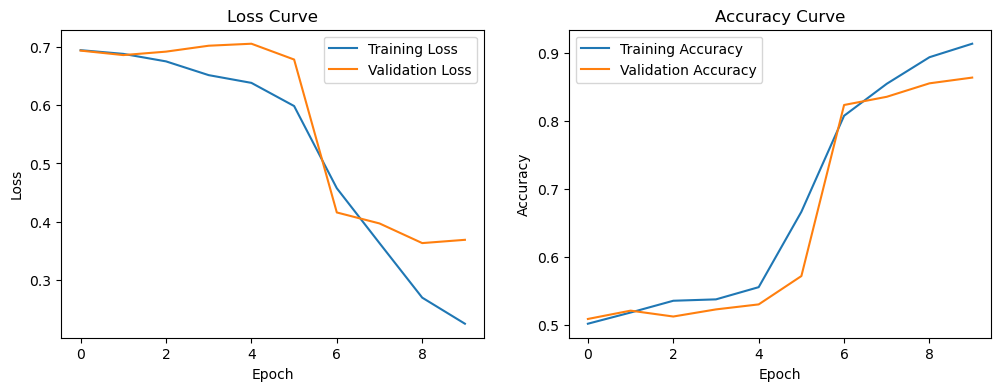

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the model
y_pred = (model.predict(x_test_padded) > 0.5).astype("int32")

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Plot learning curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')
plt.show()

 Make Predictions

In [18]:
# Function to preprocess custom review
def preprocess_review(review, vocab_size=vocab_size, max_length=max_length):
    words = review.lower().split()
    encoded_review = [word_index.get(word, 2) for word in words]  # Use 2 for unknown words
    padded_review = pad_sequences([encoded_review], maxlen=max_length, padding='post')
    return padded_review

# Example custom reviews
custom_reviews = ["The movie was fantastic and I loved it", "It was a terrible movie and I hated it"]

for review in custom_reviews:
    processed_review = preprocess_review(review)
    prediction = model.predict(processed_review)[0][0]
    sentiment = "positive" if prediction > 0.5 else "negative"
    print(f"Review: '{review}' -> Sentiment: {sentiment} (Confidence: {prediction:.2f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step
Review: 'The movie was fantastic and I loved it' -> Sentiment: positive (Confidence: 0.91)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
Review: 'It was a terrible movie and I hated it' -> Sentiment: negative (Confidence: 0.04)
